In [3]:
%run src/plm_trainer_multi.py

from src.tools import reset_cuda
reset_cuda()

for p_loss in [0.0,0.1,0.2,0.3]:
    for esm2_model_name in ["facebook/esm2_t6_8M_UR50D","facebook/esm2_t12_35M_UR50D","facebook/esm2_t30_150M_UR50D"]:
        for scores in [['total_score'],['total_score','interface_score','efield_score'],['interface_score'],['efield_score']]:
       
            output_folder        = '../../AIzymes_resi99_multi'
            df_path              = './data/240705_all_scores_resi99.csv'
            cat_resi             = 99
            epochs               = 20        

            reset_cuda()
            
            dataset = PLM_trainer(
                output_folder   = output_folder,
                verbose         = False
                )

            PLM_trainer.load_dataset(    
                dataset,            
                df_path         = df_path,
                scores          = scores,
                labels          = ['score_taken_from', 'design_method', 'cat_resn', 'cat_resi', 'parent_index', 'generation', 'mutations'],
                cat_resi        = cat_resi,
                select_unique   = True
                )

            PLM_trainer.train_PLM( 
                dataset,
                epochs          = epochs,
                esm2_model_name = esm2_model_name,
                p_loss          = p_loss 
            )

### PLM trainer loaded. ###
### Data loaded from: ./data/240705_all_scores_resi99.csv ###
### Data normalized. ###


 15%|█▌        | 3/20 [00:25<02:26,  8.62s/it]

### PLM trainer loaded. ###
All variables loaded from ../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_scores_total_score_cat_99_epochs_20_ploss_0.0.pkl


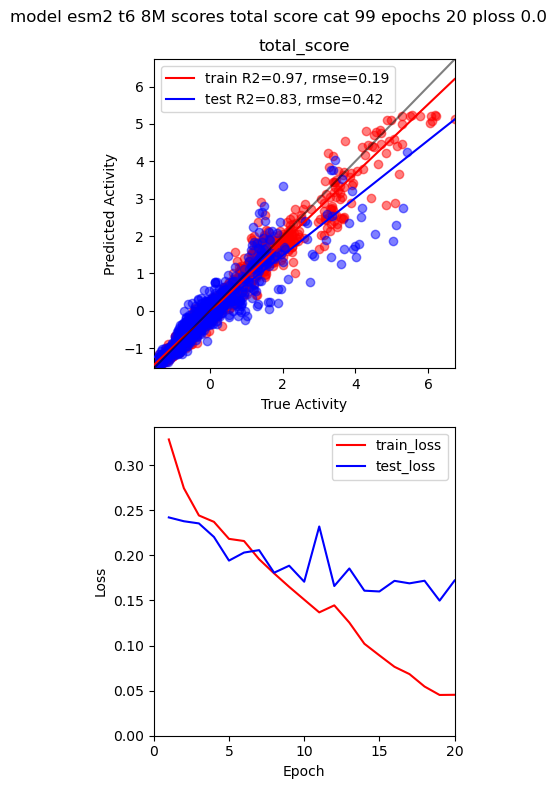

ValueError: If using all scalar values, you must pass an index

In [12]:
%run src/plm_trainer_multi.py

for scores in [['total_score'],['interface_score'],['efield_score'],['total_score','interface_score','efield_score']]:
    for esm2_model_name in ["facebook/esm2_t6_8M_UR50D","facebook/esm2_t12_35M_UR50D","facebook/esm2_t30_150M_UR50D"]:
        for p_loss in [0.0,0.1,0.2,0.3]:
    
            output_folder        = '../../AIzymes_resi99_multi'
            df_path              = './data/240705_all_scores_resi99.csv'
            cat_resi             = 99
            epochs               = 20

            dataset = PLM_trainer(
                output_folder   = output_folder,
                verbose         = True
                )

            PLM_trainer.load_self_from_file(
                dataset,
                epochs          = epochs,
                esm2_model_name = esm2_model_name,
                cat_resi        = cat_resi,
                p_loss          = p_loss,
                df_path         = df_path,
                scores          = scores,
            )

            PLM_trainer.plot_learning(
                dataset
            )

### PLM trainer loaded. ###


,file_title,esm2_model_name,cat_resi,epochs,p_loss,df_path,test_r_value_total_score,test_p_value_total_score,test_rmse_total_score
0,<bound method PLM_trainer.file_title of <__mai...,facebook/esm2_t6_8M_UR50D,99.0,20.0,0.1,./data/240705_all_scores_resi99.csv,0.908772,0.0,0.424375
1,<bound method PLM_trainer.file_title of <__mai...,facebook/esm2_t6_8M_UR50D,99.0,20.0,0.2,./data/240705_all_scores_resi99.csv,0.910946,0.0,0.409965


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bunzelh\.conda\envs\narupa\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bunzelh\AppData\Local\Temp\ipykernel_2220\1604451686.py", line 3, in <module>
    plot_summary(output_folder, models = ['facebook/esm2_t6_8M_UR50D', 'facebook/esm2_t12_35M_UR50D', 'facebook/esm2_t30_150M_UR50D'])
  File "C:\Users\bunzelh\Documents\GitHub\AIzymes\fitness_landscapes\src\plm_trainer_multi.py", line 394, in plot_summary
    if len(scores) == 1: axs = np.array([[axs[0]], [axs[1]]])  # Ensure axs is always 2D
TypeError: 'Axes' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bunzelh\.conda\envs\narupa\lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\bunzel

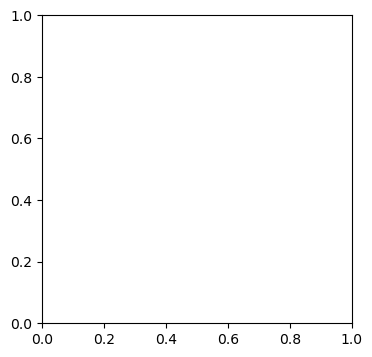

In [15]:
%run src/plm_trainer_multi.py
output_folder = '../../AIzymes_resi99_multi'
plot_summary(output_folder, models = ['facebook/esm2_t6_8M_UR50D', 'facebook/esm2_t12_35M_UR50D', 'facebook/esm2_t30_150M_UR50D'])